# Lab 12: Application of DIP
Name: **Raja Hasnain Anwar**<br/>
Registration: **192135**

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Task 1

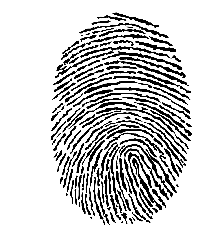

In [2]:
img = cv2.imread('ThumbImpression.png',0)

plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
img = 255-img

In [4]:
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
#ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True

In [5]:
# gaining the size back
skel = 255 - cv2.dilate(skel,element, iterations=2)

In [6]:
# removing small disjoint dots

#find all your connected components (white blobs in image)
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img, connectivity=8)

sizes = stats[1:, -1]; nb_components = nb_components - 1

# minimum size of particles we want to keep (number of pixels)
min_size = 5

#your answer image
img2 = np.zeros((output.shape))
#for every component in the image, you keep it only if it's above min_size
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        img2[output == i + 1] = 0

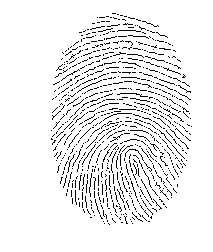

In [7]:
ret,skel = cv2.threshold(skel,127,255,0)
skel = cv2.dilate(skel,element, iterations=1)

cv2.imwrite('thinned.jpg', skel)

plt.axis('off')
plt.imshow(skel, cmap='gray')
plt.show()

# Task 2

In [8]:
def bounding_box(img):
    height, width = img.shape
    left, right = width, 0
    top, bottom = height, 0

    for x in range(width):
        for y in range(height):
            color = img[y,x]
            if color == 0:
                if x > right: right = x
                if x < left: left = x 
                if y > bottom: bottom = y
                if y < top: top = y

    print("The bounding box is:")
    print("Top: ", top, " Bottom: ", bottom, " Left: ", left, " Right: ", right)
    return top, bottom, right, left

In [9]:
def findCentroid(img, left, right, top, bottom):
    cx, cy, n = 0, 0, 0
    for x in range(left, right):
        for y in range(top, bottom):
            if img[y,x] == 0:
                cx = cx + x 
                cy = cy + y
                n += 1
    if n == 0:
        return cx, cy
    cx = cx // n
    cy = cy // n

    return cx, cy

In [10]:
def findTransitions(img, left, right, top, bottom):
    height, width = img.shape
    prevPixel = img[left,top]
    countBW = 0
    for x in range(left, right):
        for y in range(top, bottom):
            curPixel = img[y,x]
            if (curPixel == 255) and (prevPixel == 0):
                countBW += 1
            prevPixel = curPixel
    return countBW

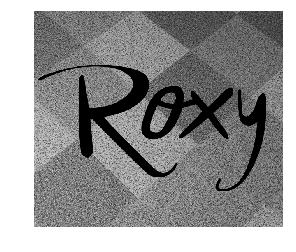

In [11]:
img = cv2.imread('Signature.png',0)

plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

In [12]:
ret,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY)

top, bottom, right, left = bounding_box(img.copy())

cx, cy = findCentroid(img.copy(), left, right, top, bottom)
print('Centrid:',cx,cy)
print('Black-to-White transitions:',findTransitions(img.copy(), left, cx, top, cy))
print('Black-to-White transitions:',findTransitions(img.copy(), cx, right, top, cy))
print('Black-to-White transitions:',findTransitions(img.copy(), left, cx, cy, bottom))
print('Black-to-White transitions:',findTransitions(img.copy(), cx, right, cy, bottom))

# img = cv2.rectangle( img.copy(), (left, top), (right, bottom), (0,0,0), 1)

img = cv2.rectangle( img.copy(), (left, top), (cx, cy), (0,0,0), 3)
img = cv2.rectangle( img.copy(), (cx, top), (right, cy), (0,0,0), 3)
img = cv2.rectangle( img.copy(), (left, cy), (cx, bottom), (0,0,0), 3)
img = cv2.rectangle( img.copy(), (cx, cy), (right, bottom), (0,0,0), 3)

The bounding box is:
Top:  133  Bottom:  440  Left:  11  Right:  566
Centrid: 309 262
Black-to-White transitions: 434
Black-to-White transitions: 326
Black-to-White transitions: 261
Black-to-White transitions: 381


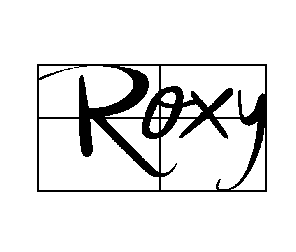

In [13]:
plt.axis('off')
plt.imshow(img, 'gray')
plt.show()